# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib

# Reading the dataset

In [3]:
df = pd.read_csv('preprocessed.csv')

In [4]:
df.head()

,Unnamed: 0,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
0,0,708746,916,103916,30-34,M,15,7350.0,1.0,1.43,2,1.0,30,34
1,1,708749,916,103917,30-34,M,16,17861.0,2.0,1.82,2,0.0,30,34
2,2,708771,916,103920,30-34,M,20,693.0,0.0,0.00,1,0.0,30,34
3,3,708815,916,103928,30-34,M,28,4259.0,1.0,1.25,1,0.0,30,34
4,4,708818,916,103928,30-34,M,28,4133.0,1.0,1.29,1,1.0,30,34


# Data Exploration

In [5]:
# Getting basic information about the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1143 non-null   int64  
 1   ad_id                1143 non-null   int64  
 2   xyz_campaign_id      1143 non-null   int64  
 3   fb_campaign_id       1143 non-null   int64  
 4   age                  1143 non-null   object 
 5   gender               1143 non-null   object 
 6   interest             1143 non-null   int64  
 7   Impressions          1143 non-null   float64
 8   Clicks               1143 non-null   float64
 9   Spent                1143 non-null   float64
 10  Total_Conversion     1143 non-null   int64  
 11  Approved_Conversion  1143 non-null   float64
 12  age_lower_bound      1143 non-null   int64  
 13  age_upper_bound      1143 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 125.1+ KB
None


,Unnamed: 0,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,571.000000,9.872611e+05,1067.382327,133783.989501,32.766404,144418.444226,24.663823,38.889503,2.130359,0.710849,36.321085,40.321085
std,330.099985,1.939928e+05,121.629393,20500.308622,26.952131,184174.591624,31.631072,50.502589,1.725866,0.817489,5.903868,5.903868
min,0.000000,7.087460e+05,916.000000,103916.000000,2.000000,87.000000,0.000000,0.000000,0.000000,0.000000,30.000000,34.000000
25%,285.500000,7.776325e+05,936.000000,115716.000000,16.000000,6503.500000,1.000000,1.480000,1.000000,0.000000,30.000000,34.000000
50%,571.000000,1.121185e+06,1178.000000,144549.000000,25.000000,51509.000000,8.000000,12.370000,1.000000,1.000000,35.000000,39.000000
75%,856.500000,1.121804e+06,1178.000000,144657.500000,31.000000,221769.000000,37.500000,60.025000,3.000000,1.000000,40.000000,44.000000
max,1142.000000,1.314415e+06,1178.000000,179982.000000,114.000000,544667.250000,92.250000,147.842500,6.000000,2.500000,45.000000,49.000000


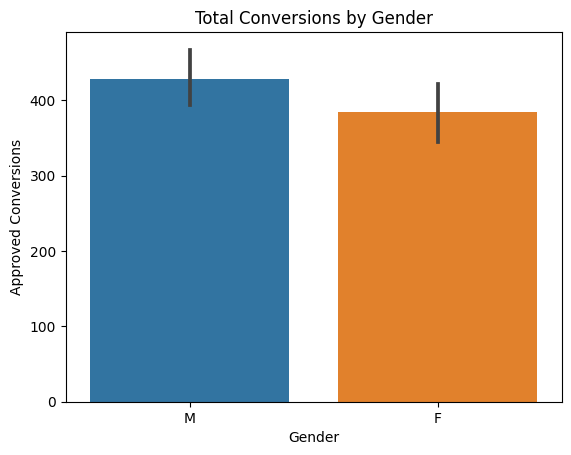

In [6]:
sns.barplot(x='gender', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Gender')
plt.ylabel('Approved Conversions')
plt.show()

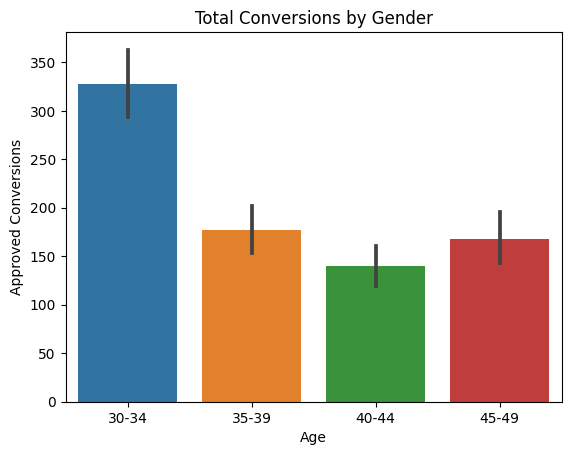

In [7]:
sns.barplot(x='age', y='Approved_Conversion', data=df, estimator=sum)
plt.title('Total Conversions by Gender')
plt.xlabel('Age')
plt.ylabel('Approved Conversions')
plt.show()

# Looking for Correlations

In [8]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})


In [9]:
df.drop(columns='age',inplace=True)
df.drop(columns='Unnamed: 0',inplace=True)
df

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
0,708746,916,103916,1,15,7350.00,1.00,1.430000,2,1.0,30,34
1,708749,916,103917,1,16,17861.00,2.00,1.820000,2,0.0,30,34
2,708771,916,103920,1,20,693.00,0.00,0.000000,1,0.0,30,34
3,708815,916,103928,1,28,4259.00,1.00,1.250000,1,0.0,30,34
4,708818,916,103928,1,28,4133.00,1.00,1.290000,1,1.0,30,34
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,0,109,544667.25,92.25,147.842500,6,2.0,45,49
1139,1314411,1178,179978,0,110,544667.25,92.25,147.842500,3,0.0,45,49
1140,1314412,1178,179979,0,111,151531.00,28.00,40.289999,2,0.0,45,49
1141,1314414,1178,179981,0,113,544667.25,92.25,147.842500,6,2.0,45,49


In [10]:
corr_matrix = df.corr()
corr_matrix['Approved_Conversion'].sort_values(ascending=False)

Approved_Conversion    1.000000
Total_Conversion       0.698901
Impressions            0.557124
Spent                  0.520597
Clicks                 0.513209
xyz_campaign_id        0.347194
ad_id                  0.335079
fb_campaign_id         0.319562
interest               0.095315
gender                 0.016451
age_lower_bound       -0.061393
age_upper_bound       -0.061393
Name: Approved_Conversion, dtype: float64

# Scatter Plot

In [11]:
# scatter_features = ['Approved_Conversion','Total_Conversion', 'Impressions', 'Spent', 'Clicks', 
#                     'xyz_campaign_id', 'ad_id', 'fb_campaign_id', 'interest', 
#                     'gender', 'age_lower_bound', 'age_upper_bound']

# # Create pair plots for selected features
# sns.pairplot(df[scatter_features])
# plt.show()

<Axes: ylabel='Density'>

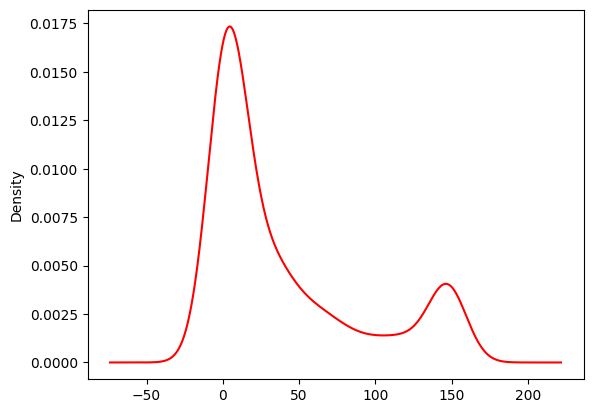

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Spent'].plot.density(color='red')

<Axes: ylabel='Density'>

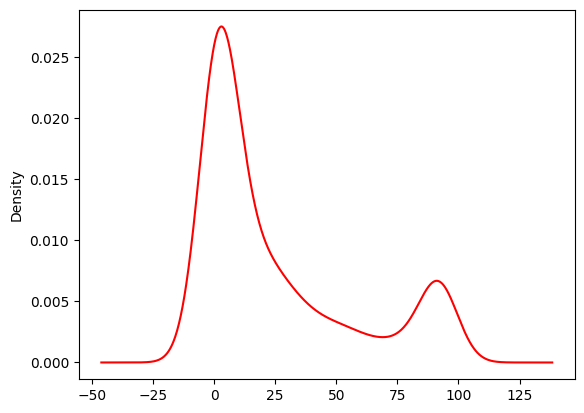

In [13]:
 fig = plt.figure()
ax = fig.add_subplot(111)
df['Clicks'].plot.density(color='red')

<Axes: ylabel='Density'>

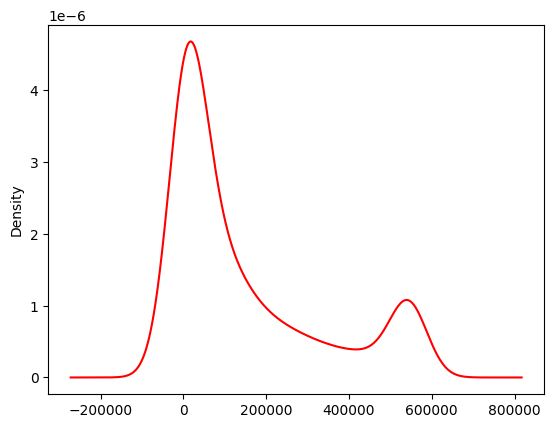

In [14]:
  fig = plt.figure()
ax = fig.add_subplot(111)
df['Impressions'].plot.density(color='red')

<Axes: ylabel='Density'>

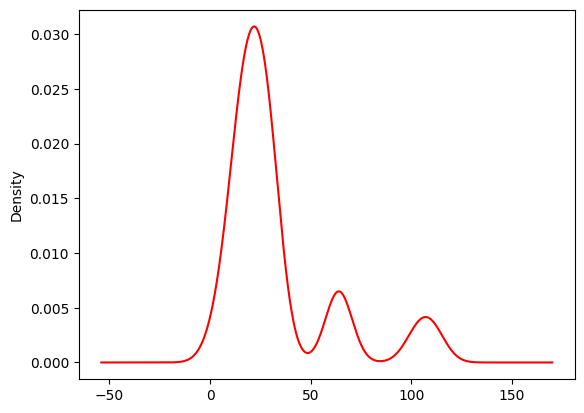

In [15]:
 fig = plt.figure()
ax = fig.add_subplot(111)
df['interest'].plot.density(color='red')

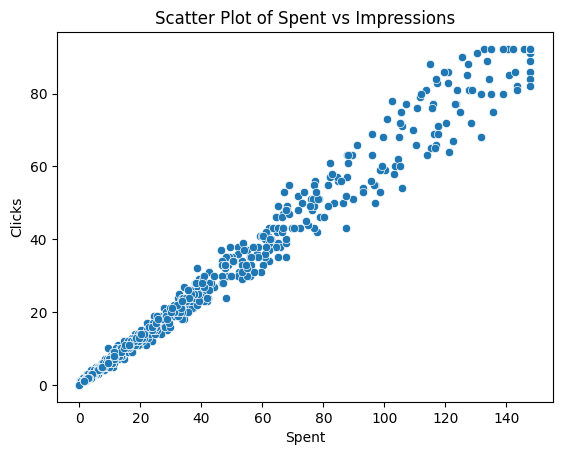

In [16]:
sns.scatterplot(x='Spent', y='Clicks', data=df)

plt.title('Scatter Plot of Spent vs Impressions')
plt.xlabel('Spent')
plt.ylabel('Clicks')
plt.show()

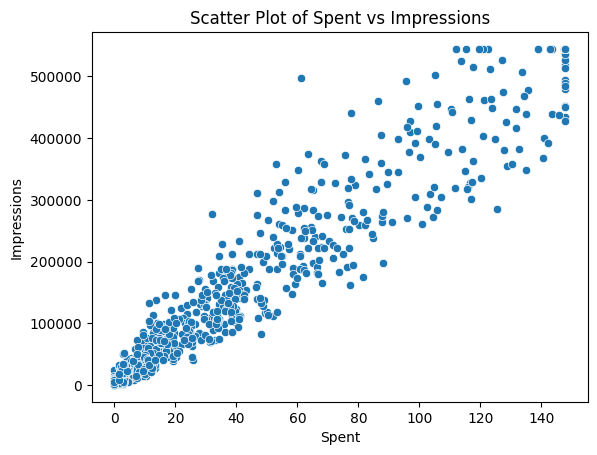

In [17]:
sns.scatterplot(x='Spent', y='Impressions', data=df)

plt.title('Scatter Plot of Spent vs Impressions')
plt.xlabel('Spent')
plt.ylabel('Impressions')
plt.show()

In [18]:
unique_values = df['Approved_Conversion'].unique()

print(unique_values)

[1.  0.  2.5 2. ]


In [19]:
value_counts = df['Approved_Conversion'].value_counts()

print(value_counts)

Approved_Conversion
0.0    559
1.0    403
2.5     95
2.0     86
Name: count, dtype: int64


In [20]:
df['Approved_Conversion'] = df['Approved_Conversion'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
df['Approved_Conversion'] 

0       1
1       0
2       0
3       0
4       1
       ..
1138    1
1139    0
1140    0
1141    1
1142    1
Name: Approved_Conversion, Length: 1143, dtype: int64

# Train test split

In [22]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
from sklearn.model_selection import train_test_split
columns_to_drop = ['Approved_Conversion', 'age_lower_bound', 'age_upper_bound']
X = df.drop(columns= columns_to_drop )
y = df['Approved_Conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")
print(f"Rows in train set: {len(y_train)}\nRows in test set: {len(y_test)}\n")

Rows in train set: 914
Rows in test set: 229

Rows in train set: 914
Rows in test set: 229



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X contains your features and y contains your binary target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.62882096069869
Confusion Matrix:
[[93 21]
 [64 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       114
           1       0.71      0.44      0.55       115

    accuracy                           0.63       229
   macro avg       0.65      0.63      0.62       229
weighted avg       0.65      0.63      0.62       229



# Selecting a Desired Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, accuracy_score # Example: Mean Squared Error for regression

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')
 

Mean Squared Error: 0.22484628820960698
RMSE: 0.47417959488953865


# Evaluating the model

array([0.50018475, 0.44752338, 0.50009673, 0.47990375, 0.45507758,
       0.40319057, 0.50318546, 0.47773849, 0.45229573, 0.49685826])

Scores: [0.50018475 0.44752338 0.50009673 0.47990375 0.45507758 0.40319057
 0.50318546 0.47773849 0.45229573 0.49685826]
Mean:  0.47160546994548014
Standard deviation:  0.030457485205326713
